## Cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import os
warnings.filterwarnings('ignore')

In [ ]:
! unzip ML_Ops_Dataset.zip

Archive:  ML_Ops_Dataset.zip
   creating: PS_DATA/
  inflating: PS_DATA/.DS_Store       
  inflating: __MACOSX/PS_DATA/._.DS_Store  
   creating: PS_DATA/Prepared from Raw/
   creating: PS_DATA/Output Ref/
   creating: PS_DATA/Raw/
  inflating: PS_DATA/Prepared from Raw/Bill_Settlement_Report.csv  
  inflating: PS_DATA/Prepared from Raw/COMBINED_CONSUMPTION.csv  
  inflating: PS_DATA/Prepared from Raw/.DS_Store  
  inflating: __MACOSX/PS_DATA/Prepared from Raw/._.DS_Store  
  inflating: PS_DATA/Prepared from Raw/Category_Consumption.csv  
  inflating: PS_DATA/Prepared from Raw/SALES_MASTERDATA_AUDIT.csv  
  inflating: PS_DATA/Prepared from Raw/Order_report_After_Print_Modification.csv  
  inflating: PS_DATA/Prepared from Raw/SALES_MASTERDATA.csv  
  inflating: PS_DATA/Prepared from Raw/CancelOrder_Summary_Item_Report.csv  
  inflating: PS_DATA/Prepared from Raw/SWIGGY_MASTERDATA.csv  
  inflating: PS_DATA/Prepared from Raw/Restaurants_order_discounted_summary.csv  
  inflating: PS_DATA

### EDA Functions

In [ ]:
def CustomInfo(df):
  for col in df.columns:
    print(f'{col},  dtype: {df[col].dtype} null_values = {df[col].isnull().sum()}')

In [ ]:
import pandas as pd

def null_value_info(df):
    """
    Prints the number of null values and percentage of null values for each column in the dataframe.
    """
    nulls = df.isnull().sum()
    null_percentage = (df.isnull().sum() / len(df)) * 100
    null_info = pd.DataFrame({
        'Null Values': nulls,
        'Percentage Null': null_percentage
    })

    # Sort by percentage of null values
    null_info = null_info[null_info['Null Values'] > 0].sort_values(by='Percentage Null', ascending=False)

    if null_info.empty:
        print("No null values in the dataset.")
    else:
        print(null_info)

# Example usage
# null_value_info(sales_masterdata)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df, figsize=(30, 25)):
    """
    Plots individual boxplots for all numerical columns in a DataFrame as subplots.

    Parameters:
    - df: pandas DataFrame
        The DataFrame containing the data.
    - figsize: tuple
        The size of the figure containing all subplots (default is (20, 5)).

    Returns:
    - None
    """
    # Select only numerical columns
    numerical_df = df.select_dtypes(include=['number'])

    # Check if there are numerical columns
    if numerical_df.shape[1] < 1:
        print("No numerical columns available to plot.")
        return  # Exit the function if no numerical columns are found

    # Set up subplots
    num_columns = numerical_df.shape[1]
    nrows = (num_columns // 4) + (num_columns % 4 > 0)  # Number of rows needed, 4 columns per row
    fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=figsize)

    # Flatten axes array for easy indexing
    axes = axes.flatten()

    # Create boxplots for each numerical column
    for i, column in enumerate(numerical_df.columns):
        try:
            # Check if the column has valid data for plotting
            valid_data = numerical_df[column].dropna()
            if valid_data.empty:
                print(f"No valid data to plot for '{column}'. Skipping...")
                continue

            sns.boxplot(y=valid_data, ax=axes[i])  # Create the boxplot on the specified axis
            axes[i].set_title(f'Boxplot of {column}', fontsize=16)  # Set title with font size
            axes[i].set_ylabel(column, fontsize=14)  # Set y-label with font size
            axes[i].grid(True)  # Optional: add grid for better readability

        except Exception as e:
            print(f"Error plotting '{column}': {e}")
            axes[i].set_title(f'Error: {column}', fontsize=16)  # Indicate error on the plot

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

In [ ]:
def plot_pairplot(df):
    """
    Creates a pairplot for all numerical columns.
    """
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    sns.pairplot(df[num_cols])
    plt.show()

# Example usage
# plot_pairplot(sales_masterdata)

In [ ]:
def plot_countplots(df):
    """
    Plots countplots for all categorical columns in the dataframe.
    The number of subplots is dynamically determined based on the number of columns.
    """

    cat_cols = df.select_dtypes(include=['object']).columns
    n_cols = len(cat_cols)

    # Calculate the number of rows and columns for the subplot grid
    n_rows = math.ceil(n_cols / 4)  # Adjust divisor (4) based on how many plots you want per row

    plt.figure(figsize=(20, n_rows * 5))  # Adjust figure size based on number of rows
    for i, col in enumerate(cat_cols, 1):
        if len(df[col].unique()) > 20:
          continue  # Limit to 10 unique values
        plt.subplot(n_rows, 4, i)
        sns.countplot(x=col, data=df)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Example usage
# plot_countplots(sales_masterdata)

In [ ]:
def plot_correlation_heatmap(df):
    """
    Plots a heatmap of the correlation between numerical columns.
    """
    plt.figure(figsize=(12, 8))
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    corr_matrix = df[num_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Columns')
    plt.show()

# Example usage
# plot_correlation_heatmap(sales_masterdata)

In [ ]:
def summarize_statistics(df):
    """
    Prints a summary of basic statistics for all numerical columns in the dataframe.
    """
    summary = df.describe().transpose()
    print(summary)

# Example usage
# summarize_statistics(sales_masterdata)

In [ ]:
def plot_distribution(df):
    """
    Plots distribution plots (histograms) for all numerical columns in the dataframe.
    The number of subplots is dynamically determined based on the number of columns.
    """
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    n_cols = len(num_cols)

    # Calculate the number of rows for the subplot grid
    n_rows = math.ceil(n_cols / 4)  # Adjust divisor for desired plots per row

    plt.figure(figsize=(20, n_rows * 5))  # Adjust figure size based on number of rows
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, 4, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

# Example usage
# plot_distribution(sales_masterdata)


In [ ]:
def visualize_outliers(df):
    """
    Visualizes outliers in the dataset using boxplots for numerical columns.
    The number of subplots is dynamically determined based on the number of columns.
    """
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    n_cols = len(num_cols)

    # Calculate the number of rows for the subplot grid
    n_rows = math.ceil(n_cols / 4)  # Adjust divisor for desired plots per row

    plt.figure(figsize=(20, n_rows * 5))  # Adjust figure size based on number of rows
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, 4, i)
        sns.boxplot(x=df[col])
        plt.title(f'Outliers in {col}')

    plt.tight_layout()
    plt.show()

# Example usage
# visualize_outliers(sales_masterdata)

In [ ]:
def EDA(df):

   print(df.head())

   print("*** Info *****")

   print(df.info())

   print('\n **** Summary Statistics ****')

   summarize_statistics(df)

   print("\n*** Missing Values *****")

   null_value_info(df)


   print('\n **** Histogram ****')

   plot_distribution(df)

   print('\n **** Boxplot ****')

   plot_boxplots(df)

   print('\n **** Pairplot ****')

   plot_pairplot(df)

   print('\n **** Countplot ****')

   plot_countplots(df)

   print('\n **** Correlation Heatmap ****')

   plot_correlation_heatmap(df)



   print('\n **** Outliers ****')

   visualize_outliers(df)

In [ ]:
import os
cleaned_folder_path = os.path.join('/content', 'cleaned_dfs')
os.makedirs(cleaned_folder_path, exist_ok=True)
#df.to_csv(os.path.join(cleaned_folder_path, 'cleaned_df1.csv'), index=False)

### Combined Consumption

In [ ]:
combined_consumption = pd.read_csv('/content/PS_DATA/Prepared from Raw/COMBINED_CONSUMPTION.csv')

         Date Item_Name  Qty_                  Timestamp Raw_Material Unit  \
0  2023-10-19       TEA   3.0  2023-10-19 22:25:34+00:00        Sugar   GM   
1  2024-06-05       TEA   2.0  2024-06-05 19:09:37+00:00        Sugar   GM   
2  2023-12-07       TEA   1.0  2023-12-07 13:03:27+00:00        Sugar   GM   
3  2024-05-10       TEA   1.0  2024-05-10 12:54:19+00:00        Sugar   GM   
4  2024-05-23       TEA   1.0  2024-05-23 18:14:26+00:00        Sugar   GM   

    Qty  converted_qty Purchase_Unit Consumption_Unit  Conversion_Qty  
0  15.0          0.015            Kg               GM            1000  
1  15.0          0.015            Kg               GM            1000  
2  15.0          0.015            Kg               GM            1000  
3  15.0          0.015            Kg               GM            1000  
4  15.0          0.015            Kg               GM            1000  
*** Info *****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386028 entries, 0 to 1386027
Data

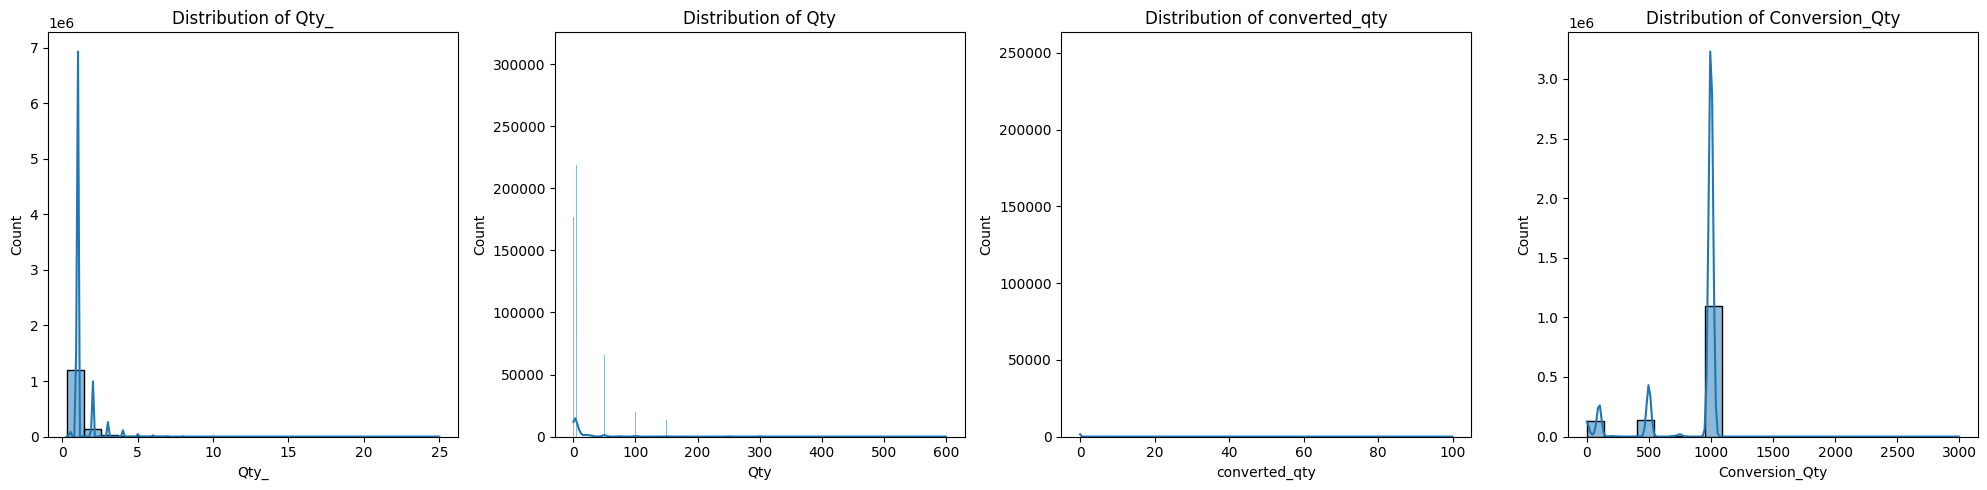


 **** Boxplot ****


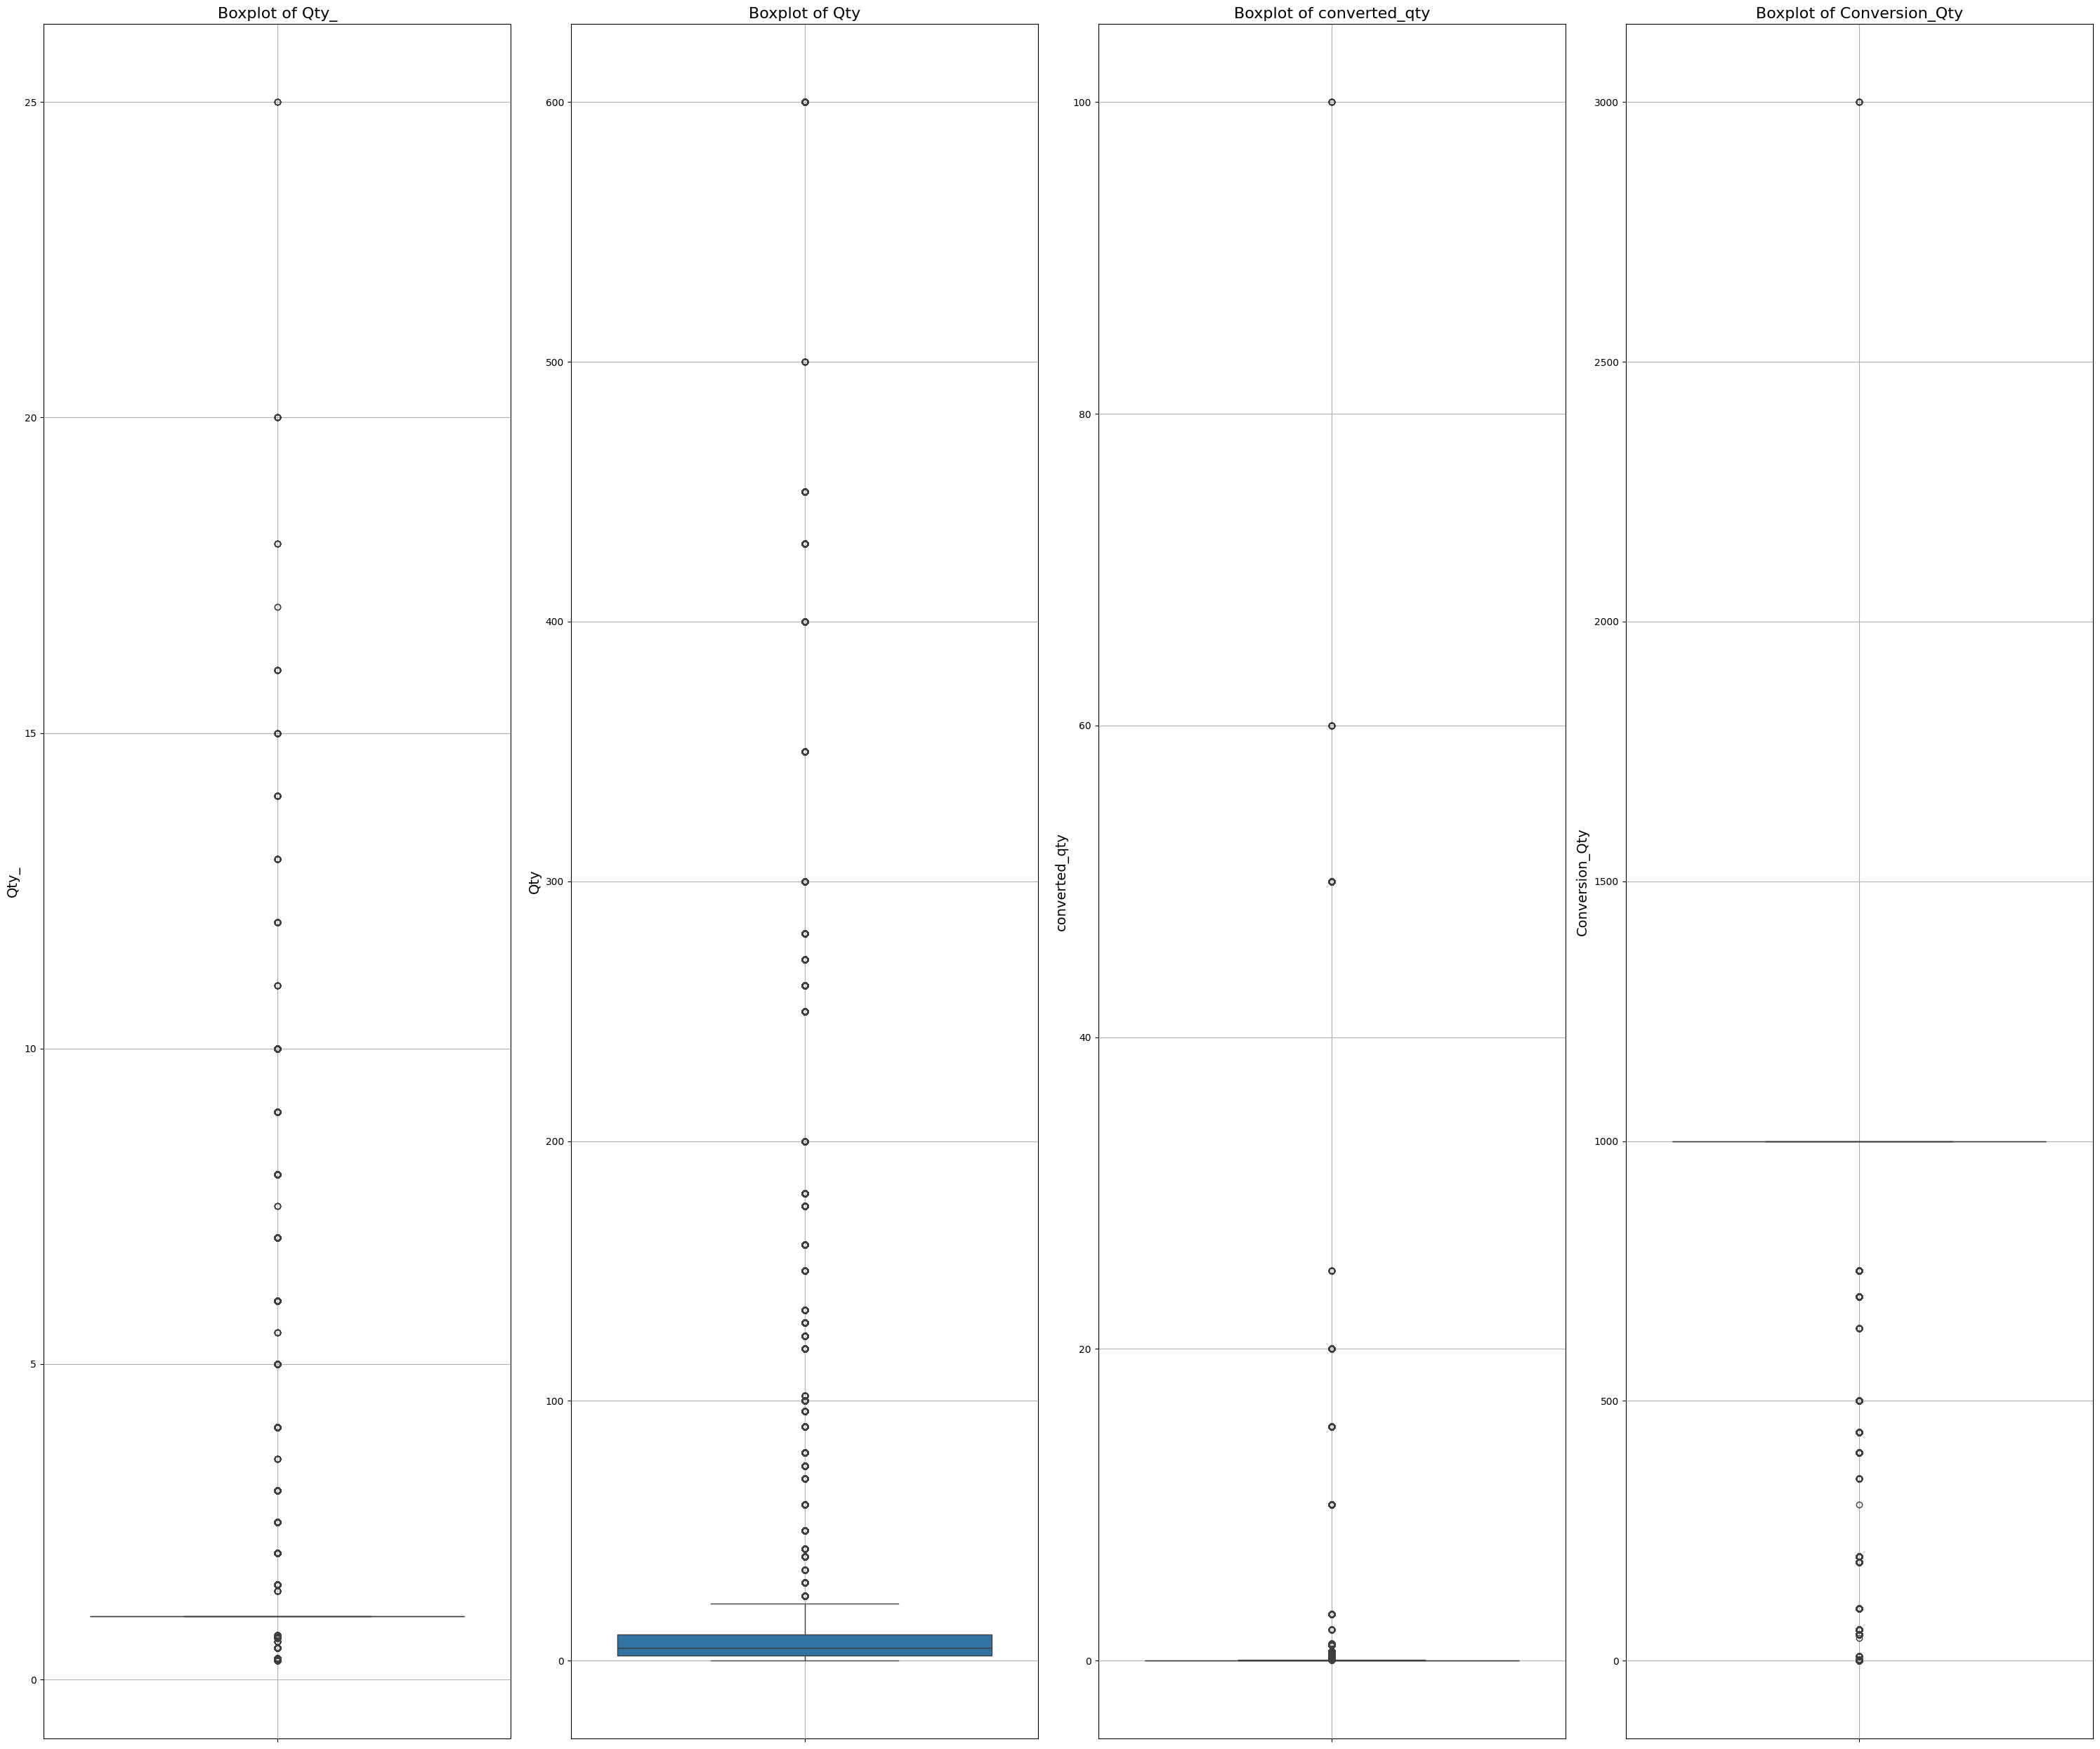


 **** Pairplot ****


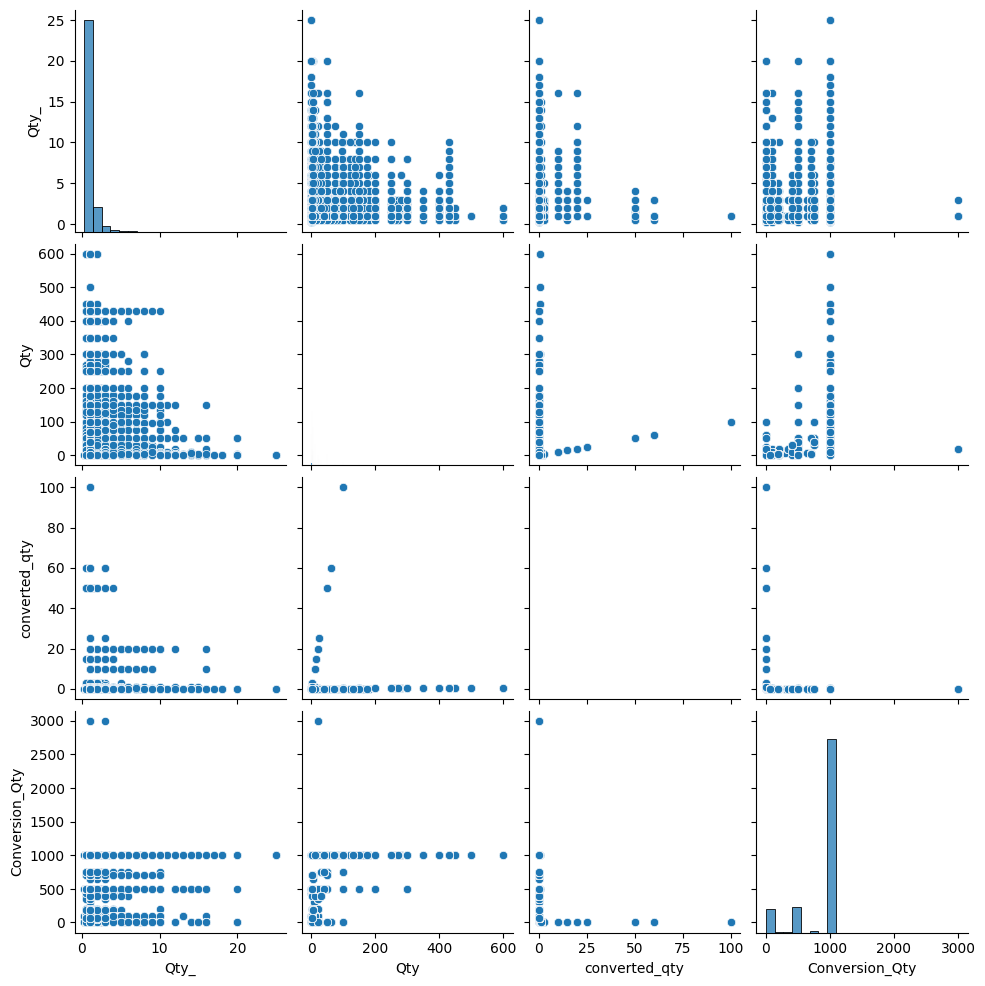


 **** Countplot ****


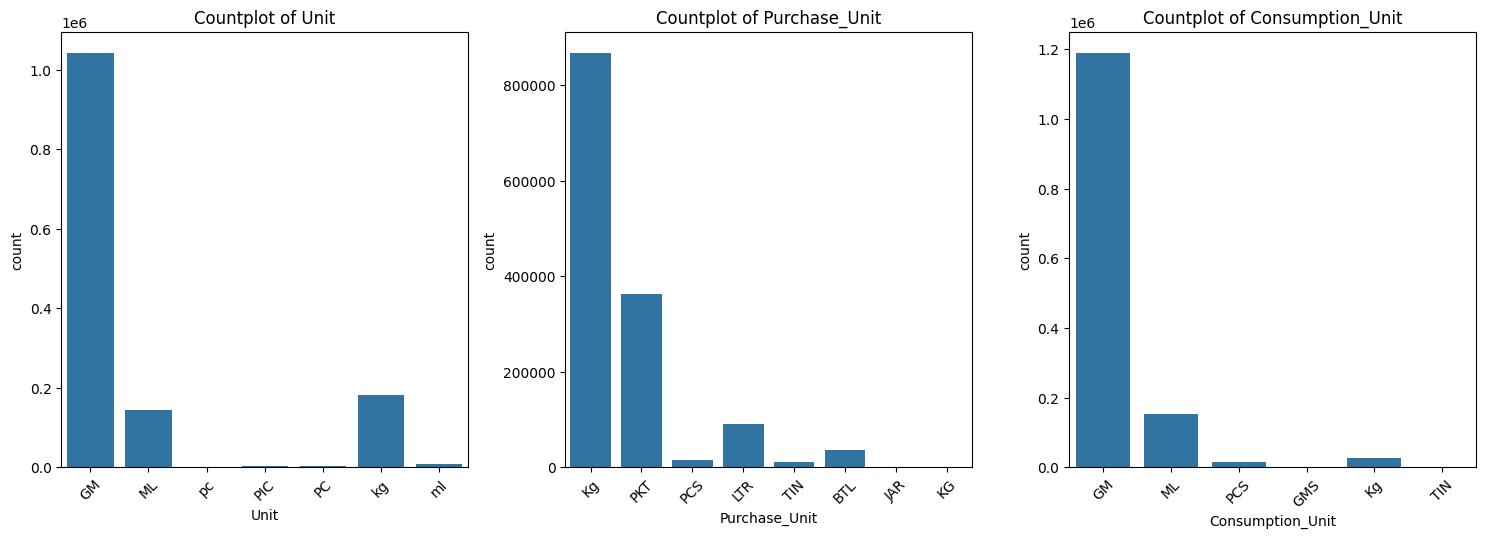


 **** Correlation Heatmap ****


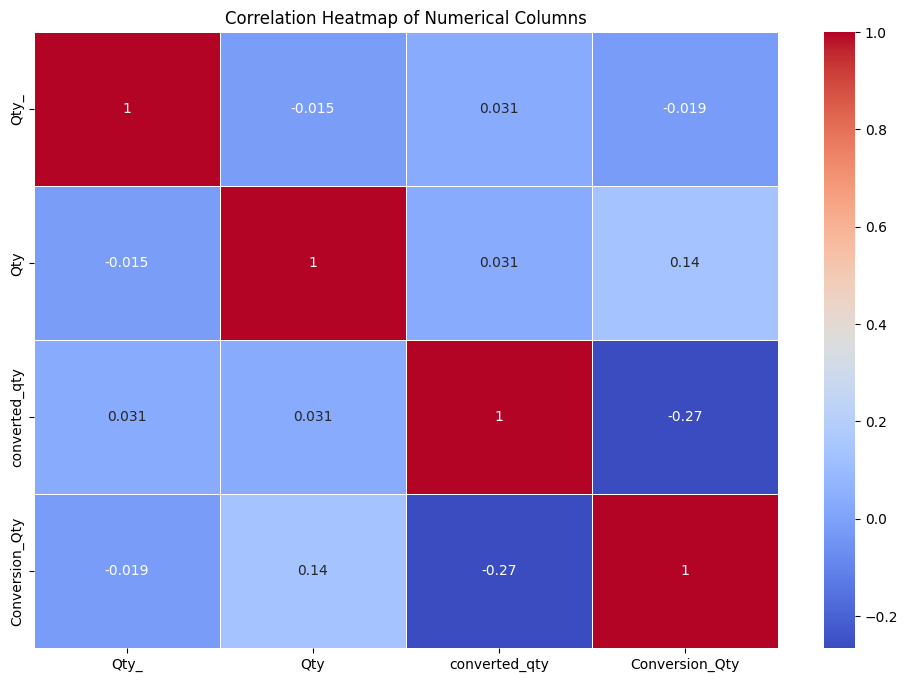


 **** Outliers ****


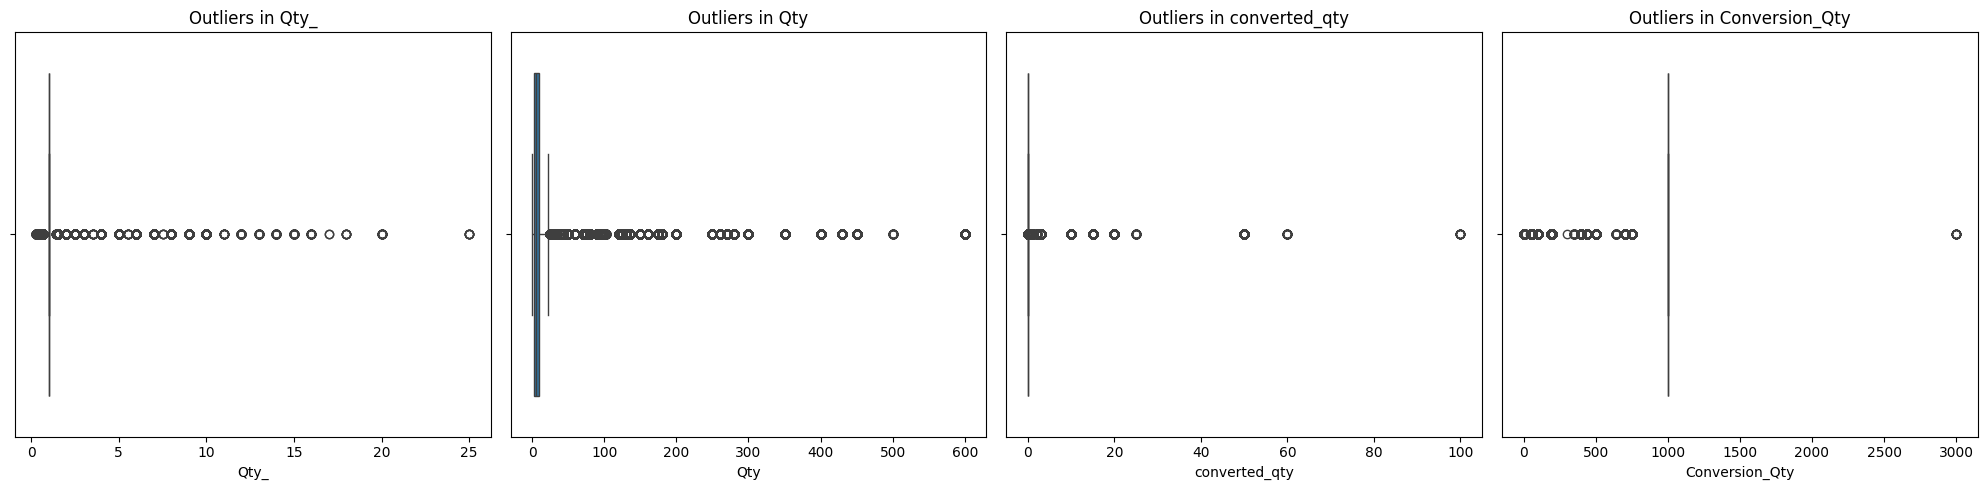

In [ ]:
EDA(combined_consumption)

In [ ]:
combined_consumption.dropna(subset=['Unit','Qty'], inplace=True)

In [ ]:
null_value_info(combined_consumption)

               Null Values  Percentage Null
converted_qty        26249         1.895352


In [ ]:
combined_consumption('Unit')

In [ ]:
combined_consumption.dropna(subset=['converted_qty'], inplace=True)

In [ ]:
null_value_info(combined_consumption)

No null values in the dataset.


In [ ]:
combined_consumption.to_csv(os.path.join(cleaned_folder_path, 'COMBINED_CONSUMPTION.csv'), index=False)

### **CancelOrder**

In [ ]:
cancel_order = pd.read_csv('/content/PS_DATA/Prepared from Raw/CancelOrder_Summary_Item_Report.csv')
# EDA(cancel_order)

In [ ]:
null_value_info(cancel_order)

                    Null Values  Percentage Null
virtual_brand_name            7            100.0
assign_to                     7            100.0
customer_phone                7            100.0
persons                       7            100.0
sap_code                      7            100.0


In [ ]:
cancel_order.drop(columns=['virtual_brand_name', 'assign_to','customer_phone', 'persons', 'sap_code'], inplace = True)

In [ ]:
null_value_info(cancel_order)



No null values in the dataset.


In [ ]:
cancel_order.to_csv(os.path.join(cleaned_folder_path, 'CancelOrder_Summary.csv'), index=False)

### Consumption Report

In [ ]:
consumption_report = pd.read_csv('/content/PS_DATA/Prepared from Raw/Consumption_Report.csv')
# EDA(consumption_report)

In [ ]:
null_value_info(consumption_report)

No null values in the dataset.


In [ ]:
consumption_report.shape

(1588805, 12)

In [ ]:
consumption_report.columns

Index(['Date', 'Item_Name', 'Qty_', 'Timestamp', 'Category', 'Raw_Material',
       'Unit', 'Qty', 'converted_qty', 'Purchase_Unit', 'Consumption_Unit',
       'Conversion_Qty'],
      dtype='object')

In [ ]:
consumption_report.to_csv(os.path.join(cleaned_folder_path, 'Consumtion_Report.csv'), index=False)

### Order Report after print

In [ ]:
order_report_after_print = pd.read_csv('/content/PS_DATA/Prepared from Raw/Order_report_After_Print_Modification.csv')
# EDA(order_report_after_print)

### Category consumption

In [ ]:
category_consumption = pd.read_csv('/content/PS_DATA/Prepared from Raw/Category_Consumption.csv')
# EDA(category_consumption)

In [ ]:
category_consumption.shape

(104, 3)

In [ ]:
category_consumption.columns

Index(['Month', 'New_Category', 'Total_Consumption'], dtype='object')

In [ ]:
null_value_info(category_consumption)

                         Null Values  Percentage Null
Total_Internal_Transfer          104       100.000000
New_Category                      16        15.384615


In [ ]:
category_consumption.drop(columns=['Total_Internal_Transfer'], inplace=True)

In [ ]:
category_consumption['New_Category'].fillna(category_consumption['New_Category'].mode()[0], inplace=True)

In [ ]:
null_value_info(category_consumption)

No null values in the dataset.


In [ ]:
category_consumption.to_csv(os.path.join(cleaned_folder_path, 'Category_Consumption.csv'), index=False)

### Merging

In [9]:
 # DFs
#combined_consumption

combined_masterdata = pd.read_csv('/content/cleaned_dfs/COMBINED_CONSUMPTION.csv')
consumption_report = pd.read_csv('/content/cleaned_dfs/Consumtion_Report.csv')
category_consumption = pd.read_csv('/content/cleaned_dfs/Category_Consumption.csv')
canceled_order = pd.read_csv('/content/cleaned_dfs/CancelOrder_Summary.csv')
merged_kot = pd.read_csv('/content/Copy of MERGED_KOT_DATA.csv')
combined_md = pd.read_csv('/content/Copy of PS_COMBINED_MASTER_csv')






FileNotFoundError: [Errno 2] No such file or directory: '/content/cleaned_dfs/COMBINED_CONSUMPTION.csv'

Index(['Date', 'Item_Name', 'Qty_', 'Timestamp', 'Category', 'Raw_Material',
       'Unit', 'Qty', 'converted_qty', 'Purchase_Unit', 'Consumption_Unit',
       'Conversion_Qty'],
      dtype='object')

## Doing Something

In [40]:
# Inventory
# Raw Materials
# Orders -> Platform Swiggy/Xomato/OnSite/ -> Item

combined_consumption = pd.read_csv('/content/Copy of COMBINED_CONSUMPTION.csv')


In [41]:
unit_map = combined_consumption[['Raw_Material', 'Unit']].drop_duplicates().set_index('Raw_Material')
unit_map_dict = unit_map.to_dict()['Unit']


In [42]:
combined_consumption.head()

,Date,Item_Name,Qty_,Timestamp,Raw_Material,Unit,Qty,converted_qty,Purchase_Unit,Consumption_Unit,Conversion_Qty
0,2023-10-19,TEA,3.0,2023-10-19 22:25:34+00:00,Sugar,GM,15.0,0.015,Kg,GM,1000
1,2024-06-05,TEA,2.0,2024-06-05 19:09:37+00:00,Sugar,GM,15.0,0.015,Kg,GM,1000
2,2023-12-07,TEA,1.0,2023-12-07 13:03:27+00:00,Sugar,GM,15.0,0.015,Kg,GM,1000
3,2024-05-10,TEA,1.0,2024-05-10 12:54:19+00:00,Sugar,GM,15.0,0.015,Kg,GM,1000
4,2024-05-23,TEA,1.0,2024-05-23 18:14:26+00:00,Sugar,GM,15.0,0.015,Kg,GM,1000


In [43]:
raw_materials = combined_consumption['Raw_Material'].unique()

In [44]:
combined_consumption.groupby(by='Raw_Material').count()

,Date,Item_Name,Qty_,Timestamp,Unit,Qty,converted_qty,Purchase_Unit,Consumption_Unit,Conversion_Qty
Raw_Material,,,,,,,,,,
8 To 9 Sauce,95,95,95,95,95,95,95,95,95,95
AJWAIN,1,1,1,1,1,1,1,1,1,1
ALMOND,796,796,796,796,796,796,796,796,796,796
AMERICAN CORN,176,176,176,176,176,176,176,176,176,176
APPLE,130,130,130,130,130,130,130,130,130,130
...,...,...,...,...,...,...,...,...,...,...
sev,374,374,374,374,374,374,374,374,374,374
sugar,6719,6719,6719,6719,6719,6719,6719,6719,6719,6719
tomato ketchup,170,170,170,170,170,170,170,170,170,170


In [45]:
(raw_materials)

array(['Sugar', 'Ginger', 'Milk 3 Fat', 'TEA POWDER', 'Green Elaichi',
       'Eggs', 'Maida', 'Salt Tata', 'Refind Oil', 'Atta', 'Clams',
       'Mango Pulp', 'Curd Mother Dairy', 'Onion', 'Cucumber',
       'Green Chilly', 'Beetroots', 'Jeera Powder', 'Potato',
       'Cauliflower', 'Peel Garlic', 'Garam Masala', 'Ghee Nandani',
       'Haldi Powder', 'Kasuri Methi', 'Kitchen King', 'Coriander Leaves',
       'Rai', 'BASMATI RICE', 'Amul Cream', 'Chat Masala', 'Jeera Whole',
       'Methi (w)', 'Coconut Milk Powder', 'Lemon', 'Boondi', 'Jal Jeera',
       'Kokum', 'Banana Leaf', 'Coconut Big', 'Dhaniya Whole',
       'Bedki Chilli Dry', 'Chicken Breast Bonless', 'Capsicum',
       'Badi Sunf', 'Dry Ginger', 'Kashmiri Chilli',
       'Cinnamon (dalchini)', 'Carrots', 'GREEN PEAS', 'FRESH BEANS',
       'Malai Paneer', 'Laung', 'Javantry', 'Star Fool', 'Tej Patta',
       'Kaju Tukda', 'Rose Water', 'Kewra Water', 'Basmati Rice',
       'Mint Leaves', 'Chicken Masala', 'Sesame Oil', 'S

In [46]:
combined_consumption_gb = combined_consumption.groupby(['Date', 'Raw_Material']).agg({
    'Qty': 'sum',
    'Unit': 'first'
})
combined_consumption_gb.head()

Qty Unit
Date       Raw_Material                    
2023-07-01 ALMOND                  6.0   GM
           APPLE                 100.0   GM
           Aalu Bukhara (plum)    40.0   GM
           American Corn        2470.0   GM
           Amul Cream           3500.0   ML

In [47]:
raw_material_dfs = {}
for rm in raw_materials:
    raw_material_dfs[rm] = combined_consumption[combined_consumption['Raw_Material'] == rm].groupby(by='Date').agg({
        'Qty': 'sum',
        'Unit': 'first'
    })




In [48]:
combined_df = pd.DataFrame(index=pd.to_datetime(combined_consumption['Date'].unique()))

# Loop over the individual raw material DataFrames and merge them
for rm, df in raw_material_dfs.items():
    combined_df = combined_df.merge(df[['Qty']], left_index=True, right_index=True, how='outer', suffixes=('', f'_{rm}')).rename(columns={'Qty': rm})



In [53]:
combined_df.index = pd.to_datetime(combined_df.index).normalize()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 352 entries, 2023-07-01 to 2024-06-16
Freq: D
Columns: 275 entries, Sugar to AJWAIN
dtypes: float64(275)
memory usage: 759.0 KB


In [54]:
# Step 1: Drop fully null rows (rows where all columns have NaN values)
combined_df = combined_df.dropna(how='all')

# Step 2: Fill partially null rows with 0 (rows where some columns have NaN but not all)
combined_df = combined_df.fillna(0)


In [51]:
# Ensure all dates are continuous
combined_df = combined_df.asfreq('D')  # 'D' ensures daily frequency of dates


In [52]:
combined_df.head(10)

,Sugar,Ginger,Milk 3 Fat,TEA POWDER,Green Elaichi,Eggs,Maida,Salt Tata,Refind Oil,Atta,...,honey,keel patta,white pepper powder,lemon grass,lemon leaves,coconut milk powder,Green Garlic,Wasabi Tube,Bamboo Shoots,AJWAIN
2023-07-01,1017.0,109.0,370.0,10.0,32.00,491.0,4016.0,995.0,1281.0,3150.0,...,0.0,0.0,0.006,0.30,0.020,0.60,0.0,0.0,0.0,0.0
2023-07-02,1354.0,195.0,690.0,0.0,36.00,798.0,7377.0,1720.0,2040.0,4300.0,...,0.0,0.0,0.000,0.06,0.004,0.12,0.0,0.0,0.0,0.0
2023-07-03,313.0,41.0,225.0,0.0,6.00,370.0,2975.0,477.0,601.0,575.0,...,0.0,0.0,0.000,0.06,0.004,0.12,0.0,0.0,0.0,0.0
2023-07-04,463.0,76.0,235.0,0.0,6.00,425.0,2935.0,649.0,841.0,1500.0,...,0.0,0.0,0.006,0.24,0.016,0.48,0.0,0.0,0.0,0.0
2023-07-05,1438.0,71.0,270.0,0.0,17.05,370.0,3206.0,658.0,888.0,1500.0,...,0.0,0.0,0.012,0.12,0.008,0.24,0.0,0.0,0.0,0.0
2023-07-06,1055.0,54.0,330.0,0.0,15.00,497.0,4166.0,745.0,912.0,1600.0,...,0.0,0.0,0.018,0.06,0.004,0.12,0.0,0.0,0.0,0.0
2023-07-07,1184.0,83.0,230.0,0.0,32.05,369.0,2912.0,824.0,1006.0,1950.0,...,0.0,0.0,0.006,0.00,0.000,0.00,0.0,0.0,0.0,0.0
2023-07-08,2440.0,138.0,820.0,10.0,32.00,444.0,4544.0,1105.0,1366.0,3275.0,...,0.0,0.0,0.006,0.42,0.028,0.84,0.0,0.0,0.0,0.0
2023-07-09,1693.0,152.0,635.0,0.0,51.00,792.0,6419.0,1470.0,1740.0,3875.0,...,0.0,0.0,0.012,0.18,0.012,0.36,0.0,0.0,0.0,0.0
2023-07-10,389.0,41.0,270.0,0.0,6.00,220.0,2475.0,529.0,603.0,1375.0,...,0.0,0.0,0.006,0.00,0.000,0.00,0.0,0.0,0.0,0.0


In [55]:
unit_map_dict['Refind Oil']

'ML'

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 352 entries, 2023-07-01 to 2024-06-16
Freq: D
Columns: 275 entries, Sugar to AJWAIN
dtypes: float64(275)
memory usage: 759.0 KB


In [58]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_df)


scaled_df = pd.DataFrame(scaled_data, index=combined_df.index, columns=combined_df.columns)


# Define the number of timesteps you want to look back for predictions
n_timesteps = 20

# Create sequences of the data (X) and the next step (Y)
def create_sequences(data, n_timesteps):
    X, Y = [], []
    for i in range(len(data) - n_timesteps):
        X.append(data[i:i + n_timesteps])
        Y.append(data[i + n_timesteps])
    return np.array(X), np.array(Y)

# Create input/output sequences
X, Y = create_sequences(scaled_df.values, n_timesteps)

# X shape will be (samples, timesteps, features)
# Y shape will be (samples, features) -> predict all raw materials at once
print(X.shape, Y.shape)  # (number_of_samples, n_timesteps, number_of_features

(332, 20, 275) (332, 275)


In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define the LSTM model
model = Sequential()

# Add a stacked LSTM layer with recurrent dropout
model.add(LSTM(
    units=128,
    activation='tanh',
    return_sequences=True,
    input_shape=(n_timesteps, X.shape[2]),
    recurrent_dropout=0.2
))
model.add(Dropout(0.3))

# Another LSTM layer without return_sequences since this is the last one
model.add(LSTM(
    units=64,
    activation='tanh',
    recurrent_dropout=0.2
))
model.add(Dropout(0.3))

# Dense layer with L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer: one output per raw material
model.add(Dense(X.shape[2]))  # Number of raw materials

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X, Y, epochs=100, batch_size=16, validation_split=0.2)



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.4861 - val_loss: 0.4004
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.3806 - val_loss: 0.3179
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.3039 - val_loss: 0.2602
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.2534 - val_loss: 0.2139
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.2042 - val_loss: 0.1762
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1674 - val_loss: 0.1462
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1412 - val_loss: 0.1224
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1167 - val_loss: 0.1028
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0982 - val_loss: 0.0875
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0843 - val_loss: 0.0756
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0739 - val_loss: 0.0653
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.

In [97]:
import joblib

model.save('lstm_model.h5')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [99]:
raw_material_columns = combined_df.columns.tolist()
joblib.dump(raw_material_columns, 'columns.pkl')
joblib.dump(unit_map_dict, 'unit_map.pkl')

['unit_map.pkl']

In [68]:
old_model = tf.keras.models.load_model('lstm_model.h5', custom_objects={'mse': tf.keras.losses.MeanSquaredError()})

### Loading

In [75]:
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = tf.keras.models.load_model('lstm_model.h5',  custom_objects={'mse': tf.keras.losses.MeanSquaredError()})
scaler = joblib.load('scaler.pkl')
raw_material_columns = joblib.load('columns.pkl')
unit_map = joblib.load('unit_map.pkl')
combined_df = pd.read_csv('/content/Raw_material_consumption_per_day.csv')

In [85]:
import numpy as np

def forecast_future(model, data, n_future, scaler, n_timesteps=20):
    """
    Predict future consumption based on the most recent data
    :param model: trained LSTM model
    :param data: scaled input data (from the original dataset)
    :param n_timesteps: number of timesteps to look back
    :param n_future: number of future days to predict
    :param scaler: scaler used to scale the data (for inverse scaling later)
    :return: forecasted values
    """
    # Start with the most recent n_timesteps from the data
    recent_data = data[-n_timesteps:]

    # Empty list to store the predictions
    predictions = []

    # Generate predictions for n_future days
    for _ in range(n_future):
        # Reshape recent_data to (1, n_timesteps, n_features) to predict the next day
        recent_data_reshaped = recent_data.reshape((1, n_timesteps, data.shape[1]))

        # Predict the next day's consumption
        next_pred = model.predict(recent_data_reshaped)

        # Append the predicted values to the predictions list
        predictions.append(next_pred[0])

        # Update recent_data to include the predicted values (slide the window)
        recent_data = np.vstack([recent_data[1:], next_pred[0]])

    # Convert predictions to a numpy array and inverse scale it
    predictions = np.array(predictions)
    predictions = scaler.inverse_transform(predictions)

    return predictions


def predict_future(model,scaler,df, n_future,feature):
    scaled_df = scaler.transform(df)
    future_predictions = forecast_future(model, scaled_df.values, n_future, scaler)




In [79]:
raw_mut = pd.read_csv('/content/Raw_material_consumption_per_day.csv')
raw_mut.head()

,Unnamed: 0,Sugar,Ginger,Milk 3 Fat,TEA POWDER,Green Elaichi,Eggs,Maida,Salt Tata,Refind Oil,...,Mustard Kasundi 1000gm,Worcestershire Sauce Kalvert (bar),Makai Atta,Black Till,Black Fungus,Black Beans Seed,Sambal Oleal Sauce,Crab Whole Big,Green Olive Slice,Unnamed: 209
0,2023-07-01,66.0,4.0,160.0,10.0,1.0,75.0,950.0,154.0,218.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-07-02,273.0,27.0,80.0,0.0,4.0,140.0,976.0,296.0,360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-07-03,35.0,5.0,20.0,0.0,1.0,60.0,410.0,45.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-07-04,83.0,10.0,40.0,0.0,1.0,100.0,190.0,104.0,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-07-05,228.0,5.0,90.0,0.0,3.0,30.0,221.0,124.0,142.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
raw_mut.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
raw_mut.set_index('Date', inplace=True)
raw_mut.head()

,Sugar,Ginger,Milk 3 Fat,TEA POWDER,Green Elaichi,Eggs,Maida,Salt Tata,Refind Oil,Atta,...,Mustard Kasundi 1000gm,Worcestershire Sauce Kalvert (bar),Makai Atta,Black Till,Black Fungus,Black Beans Seed,Sambal Oleal Sauce,Crab Whole Big,Green Olive Slice,Unnamed: 209
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-01,66.0,4.0,160.0,10.0,1.0,75.0,950.0,154.0,218.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-02,273.0,27.0,80.0,0.0,4.0,140.0,976.0,296.0,360.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-03,35.0,5.0,20.0,0.0,1.0,60.0,410.0,45.0,88.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-04,83.0,10.0,40.0,0.0,1.0,100.0,190.0,104.0,144.0,300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-05,228.0,5.0,90.0,0.0,3.0,30.0,221.0,124.0,142.0,325.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
n_future = 100  # Number of future days to predict
future_predictions = forecast_future(model, scaled_df.values, n_future, scaler)

# The result will be a NumPy array with shape (n_future, number_of_raw_materials)
print(future_predictions.shape)  # (30, number_of_raw_materials)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━

In [93]:
future_df = pd.DataFrame(future_predictions, columns=combined_df.columns)

# Set the date range as the index for easy plotting later
future_df['Date'] = pd.date_range(start=combined_df.index[-1], periods=n_future + 1, freq='D')[1:]
future_df.set_index('Date', inplace=True)

# Check the structure of the new DataFrame
future_df.head()

ValueError: Shape of passed values is (100, 275), indices imply (100, 210)

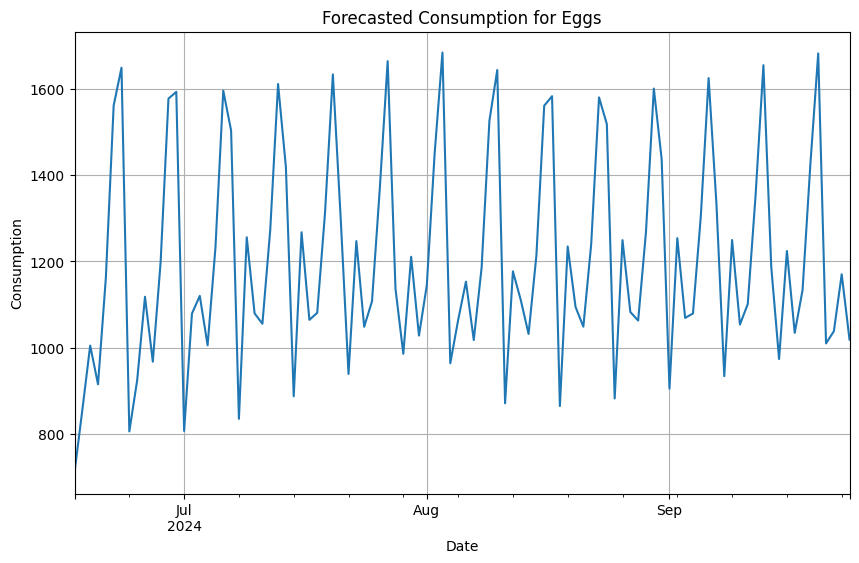

In [88]:
# Example: Plotting the forecasted consumption for "Sugar"
future_df['Sugar'].plot(figsize=(10, 6), title="Forecasted Consumption for Eggs", xlabel="Date", ylabel="Consumption")
plt.grid(True)
plt.show()

In [90]:
new_df = pd.concat([combined_df,future_df])

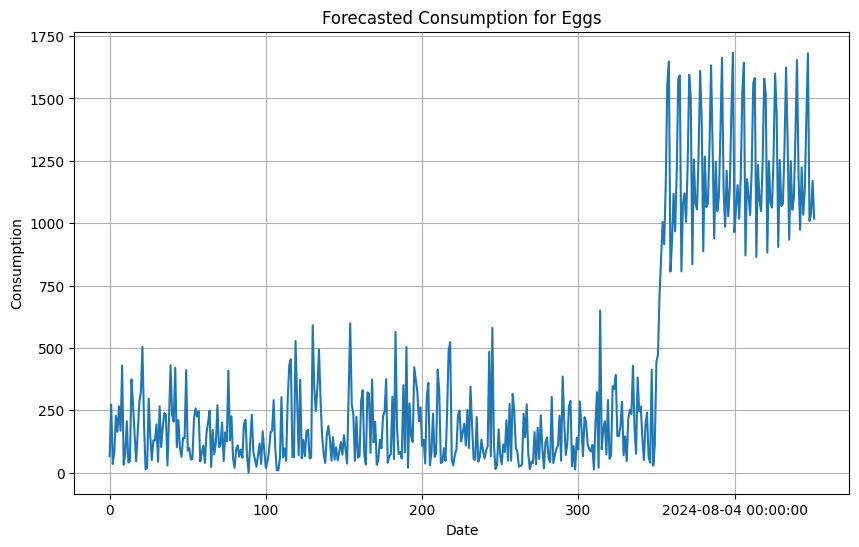

In [91]:
new_df['Sugar'].plot(figsize=(10, 6), title="Forecasted Consumption for Eggs", xlabel="Date", ylabel="Consumption")
plt.grid(True)
plt.show()